In [1]:
import sys, os
sys.path.append(os.path.abspath(".."))

import os
import numpy as np
from pathlib import Path
from astropy.io import fits
import matplotlib.pyplot as plt

import wget
import scipy.ndimage as ndimage
import matplotlib.image as mpimg
from scipy import ndimage
from ratansunpy.time import TimeRange
from ratansunpy.client import  ARClient, SRSClient, RATANClient
from src.utils import clipped_zoom

import warnings
warnings.filterwarnings("ignore")

/home/mk/ar_patches_astronomycomputing/venv/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [2]:
ROOT_DIR = Path(os.getcwd()).resolve().parent
AR_TIMERANGE = TimeRange('2015-06-21', '2015-06-22')

AR_NUM = 2371

# to sort local AR paths to specific day and azimuth 
DATE = '20150622'  
AZIMUTH = '_0.0.fits'

CACHE = True

In [ ]:
ar_client = ARClient()
ar_urls = ar_client.acquire_data(timerange=AR_TIMERANGE, ar_nums=[str(AR_NUM)], cache=CACHE)
print(ar_urls)

local_ar_paths = ar_client.download_data(timerange=AR_TIMERANGE, ar_nums=[str(AR_NUM)], azimuths=[0], cache=CACHE, 
                                         save_to=os.path.join(ROOT_DIR, 'data', 'raw', f"AR{AR_NUM}"))

print(*local_ar_paths[:5], sep="\n")

['http://spbf.sao.ru/data/solar_data/AR_data/2015/20150621_074746_AR2371_20.0.fits', 'http://spbf.sao.ru/data/solar_data/AR_data/2015/20150621_075635_AR2371_18.0.fits', 'http://spbf.sao.ru/data/solar_data/AR_data/2015/20150621_080523_AR2371_16.0.fits', 'http://spbf.sao.ru/data/solar_data/AR_data/2015/20150621_081410_AR2371_14.0.fits', 'http://spbf.sao.ru/data/solar_data/AR_data/2015/20150621_082256_AR2371_12.0.fits', 'http://spbf.sao.ru/data/solar_data/AR_data/2015/20150621_083141_AR2371_10.0.fits', 'http://spbf.sao.ru/data/solar_data/AR_data/2015/20150621_084025_AR2371_8.0.fits', 'http://spbf.sao.ru/data/solar_data/AR_data/2015/20150621_084909_AR2371_6.0.fits', 'http://spbf.sao.ru/data/solar_data/AR_data/2015/20150621_085753_AR2371_4.0.fits', 'http://spbf.sao.ru/data/solar_data/AR_data/2015/20150621_090636_AR2371_2.0.fits', 'http://spbf.sao.ru/data/solar_data/AR_data/2015/20150621_091519_AR2371_0.0.fits', 'http://spbf.sao.ru/data/solar_data/AR_data/2015/20150621_092402_AR2371_-2.0.fit

/home/mk/ar_patches_astronomycomputing/data/AR2371/20150621_091519_AR2371_0.0.fits
/home/mk/ar_patches_astronomycomputing/data/AR2371/20150622_091532_AR2371_0.0.fits


In [18]:
one_data_ar_paths = [path for path in local_ar_paths if DATE in path and AZIMUTH in path]
one_data_ar_paths

['/home/mk/ar_patches_astronomycomputing/data/AR2371/20150622_091532_AR2371_0.0.fits']

Text(0.5, 1.0, 'V value across FREQ')

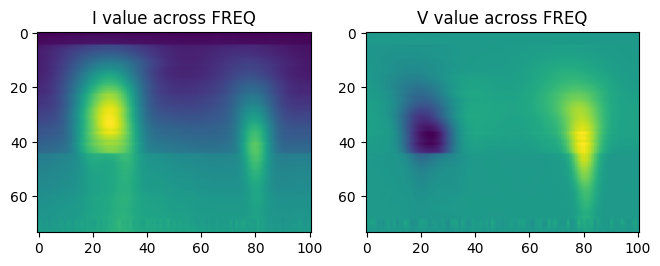

In [19]:
with fits.open(one_data_ar_paths[0]) as hdul:
    AR_4140_hdul = hdul
    AR_4140_data = AR_4140_hdul[0].data
    
plt.figure(figsize=(12,5))
plt.subplot(131); plt.imshow(AR_4140_data[0]); plt.title("I value across FREQ")
plt.subplot(132); plt.imshow(AR_4140_data[1]); plt.title("V value across FREQ")
#plt.subplot(133); plt.imshow(AR_4140_data.data[2]); plt.title("Mask value across FREQ")

In [4]:
noaa_client = SRSClient()
ARs_table = noaa_client.get_data(AR_TIMERANGE)
AR_4140_SRS_table = ARs_table[ARs_table['Number'] == AR_NUM]

FTP CWD tried: 550 /pub/warehouse/2015/SRS/: No such file or directory
No results from the main URL, trying the backup URL.


In [40]:
AR_4140_SRS_table.pprint(max_lines=10)

   Date     ID Number ...     Mag Type     Latitude Longitude
---------- --- ------ ... ---------------- -------- ---------
2015-06-17   I   2371 ...             Beta     11.0     -66.0
2015-06-18   I   2371 ...       Beta-Gamma     12.0     -53.0
2015-06-19   I   2371 ... Beta-Gamma-Delta     12.0     -39.0
       ... ...    ... ...              ...      ...       ...
2015-06-27   I   2371 ...       Beta-Gamma     13.0      64.0
2015-06-28   I   2371 ...       Beta-Gamma     12.0      79.0
2015-06-29   I   2371 ...             Beta     13.0      92.0
Length = 13 rows


In [8]:
for card in AR_4140_hdul[0].header.cards:
    print(card)

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                  101                                                  
NAXIS2  =                   78                                                  
NAXIS3  =                    3                                                  
EXTEND  =                    T                                                  
AR_NUM  =                 2371                                                  
LATITUDE=  -478.89540257722183                                                  
DATE-OBS= '2015/06/19'                                                          
TIME-OBS= '09:14:53.440'                                                        
CDELT1  =        2.89138798294                                                  
CRPIX   =           527.2590

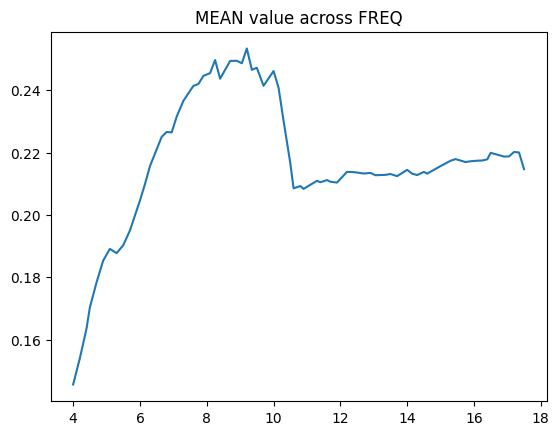

In [9]:
with fits.open(one_data_ar_paths[0]) as hdul:
    ar_hdul = hdul

    plt.plot(ar_hdul[6].data, ar_hdul[1].data); plt.title(f"{ar_hdul[1].name} value across {ar_hdul[6].name}")

In [ ]:
RATAN_TIMERANGE = TimeRange('2015-06-18', '2015-06-19')

ratan_client = RATANClient()
ratan_data = ratan_client.get_scans(RATAN_TIMERANGE)

data = ratan_data[
    (ratan_data['Date'] == '2015-06-19') & (ratan_data['Azimuth'] == 0)
]

x = np.linspace(
    - data['CRPIX'][0] * data['CDELT1'][0],
    (data['N_shape'][0] - data['CRPIX'][0]) * data['CDELT1'][0],
    num=data['N_shape'][0]
)
solar_r = data['SOLAR_R']
sun_data = data['I'][0]



mask = (x >= -1.1 * solar_r) & (x <= 1.1 * solar_r)
x_masked = x[mask]


print(list(sun_data.keys()).index(10))



I_300 = list(sun_data.values())[1][mask]
freq_300 = list(sun_data.keys())[1]


I_375 = list(sun_data.values())[5][mask]
freq_375 = list(sun_data.keys())[5]


I_935 = list(sun_data.values())[34][mask]
freq_935 = list(sun_data.keys())[34]


I_1000 = list(sun_data.values())[37][mask]
freq_1000 = list(sun_data.keys())[37]



In [ ]:
#file_url = 'https://solarmonitor.org/data/2015/06/19/pngs/shmi/shmi_maglc_fd_20150618_235825.png' 
#filename = file_url.split('/')[-1]
solar_disc_path = "/home/mk/ar_patches_astronomycomputing/data/shmi_fd_20150619.png"

img = mpimg.imread(solar_disc_path)

# --- 2. Обработка картинки ---
im = ndimage.rotate(img, 0, reshape=True)  # сохраняем весь диск
im = clipped_zoom(im, 1)                 # масштабируем
im = np.clip(im, 0, 1)                     # фиксим warning по цветовому диапазону

# --- 3. Настройка координат для графика ---
xmin, xmax = x_masked.min(), x_masked.max()
ymin = min(I_300.min(), I_375.min(), I_935.min(), I_1000.min())
ymax = max(I_300.max(), I_375.max(), I_935.max(), I_1000.max())

# --- 4. Построение графика ---

plt.rcParams.update({
    "font.size": 18,          # base font size
    "axes.titlesize": 20,     # title font size
    "axes.labelsize": 18,     # x and y labels
    "xtick.labelsize": 16,    # x ticks
    "ytick.labelsize": 16,    # y ticks
    "legend.fontsize": 16     # legend
})

fig, ax = plt.subplots(figsize=(10, 6))

# фон
ax.imshow(im, extent=[xmin, xmax, ymin, ymax], aspect='auto', zorder=0, interpolation='bicubic')

# накладываем графики с яркими цветами и толстыми линиями
ax.plot(x_masked, I_300,  color='green',  lw=2.5, label=f'{freq_300:.2f} GHz')
ax.plot(x_masked, I_375,  color='blue',   lw=2.5, label=f'{freq_375:.2f} GHz')
ax.plot(x_masked, I_935,  color='red',    lw=2.5, label=f'{freq_935:.2f} GHz')
ax.plot(x_masked, I_1000, color='yellow', lw=2.5, label=f'{freq_1000:.2f} GHz')

# подписи
ax.set_xlabel('Distance from solar centre, arcsec')
ax.set_ylabel('Spectral Flux Density, s.f.u.')
ax.set_title('RATAN-600 and SDO HMI data, 2015-06-19')

plt.legend()
plt.tight_layout()
plt.show()